# Example of Feature Extraction through Renormalized Mutual Information maximization

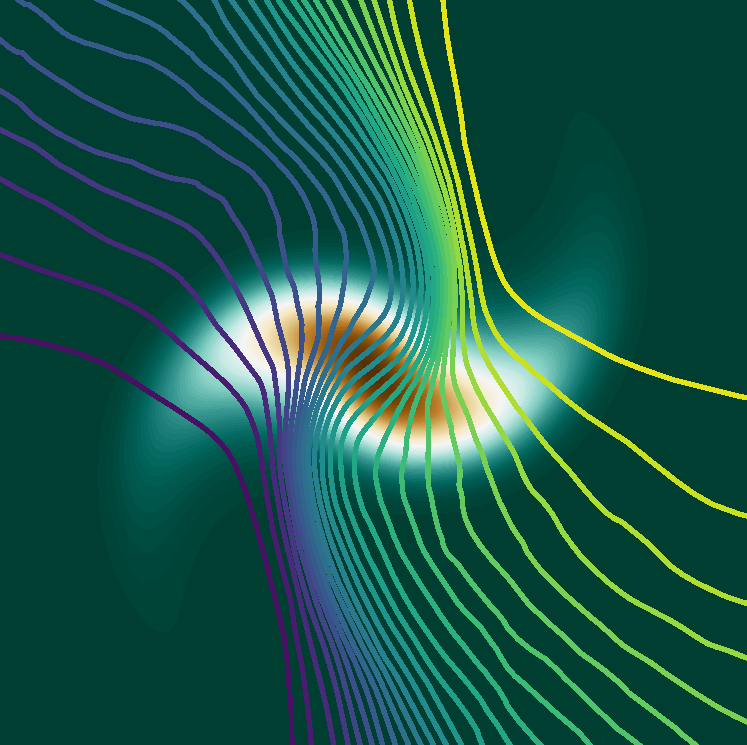

```
Copyright (C) 2020

Code by Leopoldo Sarra and Florian Marquardt
Max Planck Institute for the Science of Light, Erlangen, Germany
http://www.mpl.mpg.de

This work is licensed under the Creative Commons Attribution 4.0 International License. To view a copy of this license, visit http://creativecommons.org/licenses/by/4.0/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.

If you find this code useful in your work, please cite our article
"Renormalized Mutual Information for Artificial Scientific Discovery", Leopoldo Sarra, Andrea Aiello, Florian Marquardt, arXiv:2005.01912

available on

https://arxiv.org/abs/2005.01912
```


In this notebook we show how one can extract an optimal feature by maximizing renormalized mutual information. 

This is the code used to generate the example with the spiral-shaped distribution in the paper. Please note that this could be also generalized to distributions of any shape, even without explicitly knowing the probability distribution, by replacing the weighted averages in the integrals (i.e. $\int dx P_x(x)$) with stochastic sampling $x\sim P_x(x)$ (instead of sampling $x$ uniformly on a lattice).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils.rmi_extractor import FeatureExtractor
from utils.examples import SpiralDistribution

In [2]:
sx1 = 0.8
sx2 = 1
rho = -0.7
alpha =0.5

Ngrid = 100
neurons = 180
N_train = 1000
eta = 0.01
eta_decay_step = 50
eta_decay_rate = 0.9
output ="none"

In [3]:
# Define the input distribution
sp = SpiralDistribution(sx=sx1,
                        sy=sx2,
                        r=rho,
                        alpha=alpha)

N = Ngrid

xmin = -4
xmax = 4
xdelta = (xmax-xmin)/(N-1)

N_train = N_train

x_linspace = np.linspace(xmin, xmax, N)
x1_grid, x2_grid = np.meshgrid(x_linspace, x_linspace, indexing='ij')
x_points = np.array([x1_grid.flatten(), x2_grid.flatten()])

P_x = sp.P_x(x_points.T).reshape([N, N])

In [ ]:
# Define the Neural Network
feature_extr = FeatureExtractor()
feature_extr.build(Px=P_x,
                   dx=xdelta,
                   X=x_points,
                   N_neurons=neurons,
                   eta=eta,
                   exp_decay=[eta_decay_step, eta_decay_rate])

In [5]:
# Train the network to extract the best feature
j = 0
for i in range(N_train):
    feature_extr.train_step(j)
    j += 1

In [6]:
# Get the extracted feature (and normalize it to have uniform distribution)
f = feature_extr.feature()

a = - np.sign(f[0, 0]-f[-1, -1])
fnorm = feature_extr.feature_gaugeFixed(a)

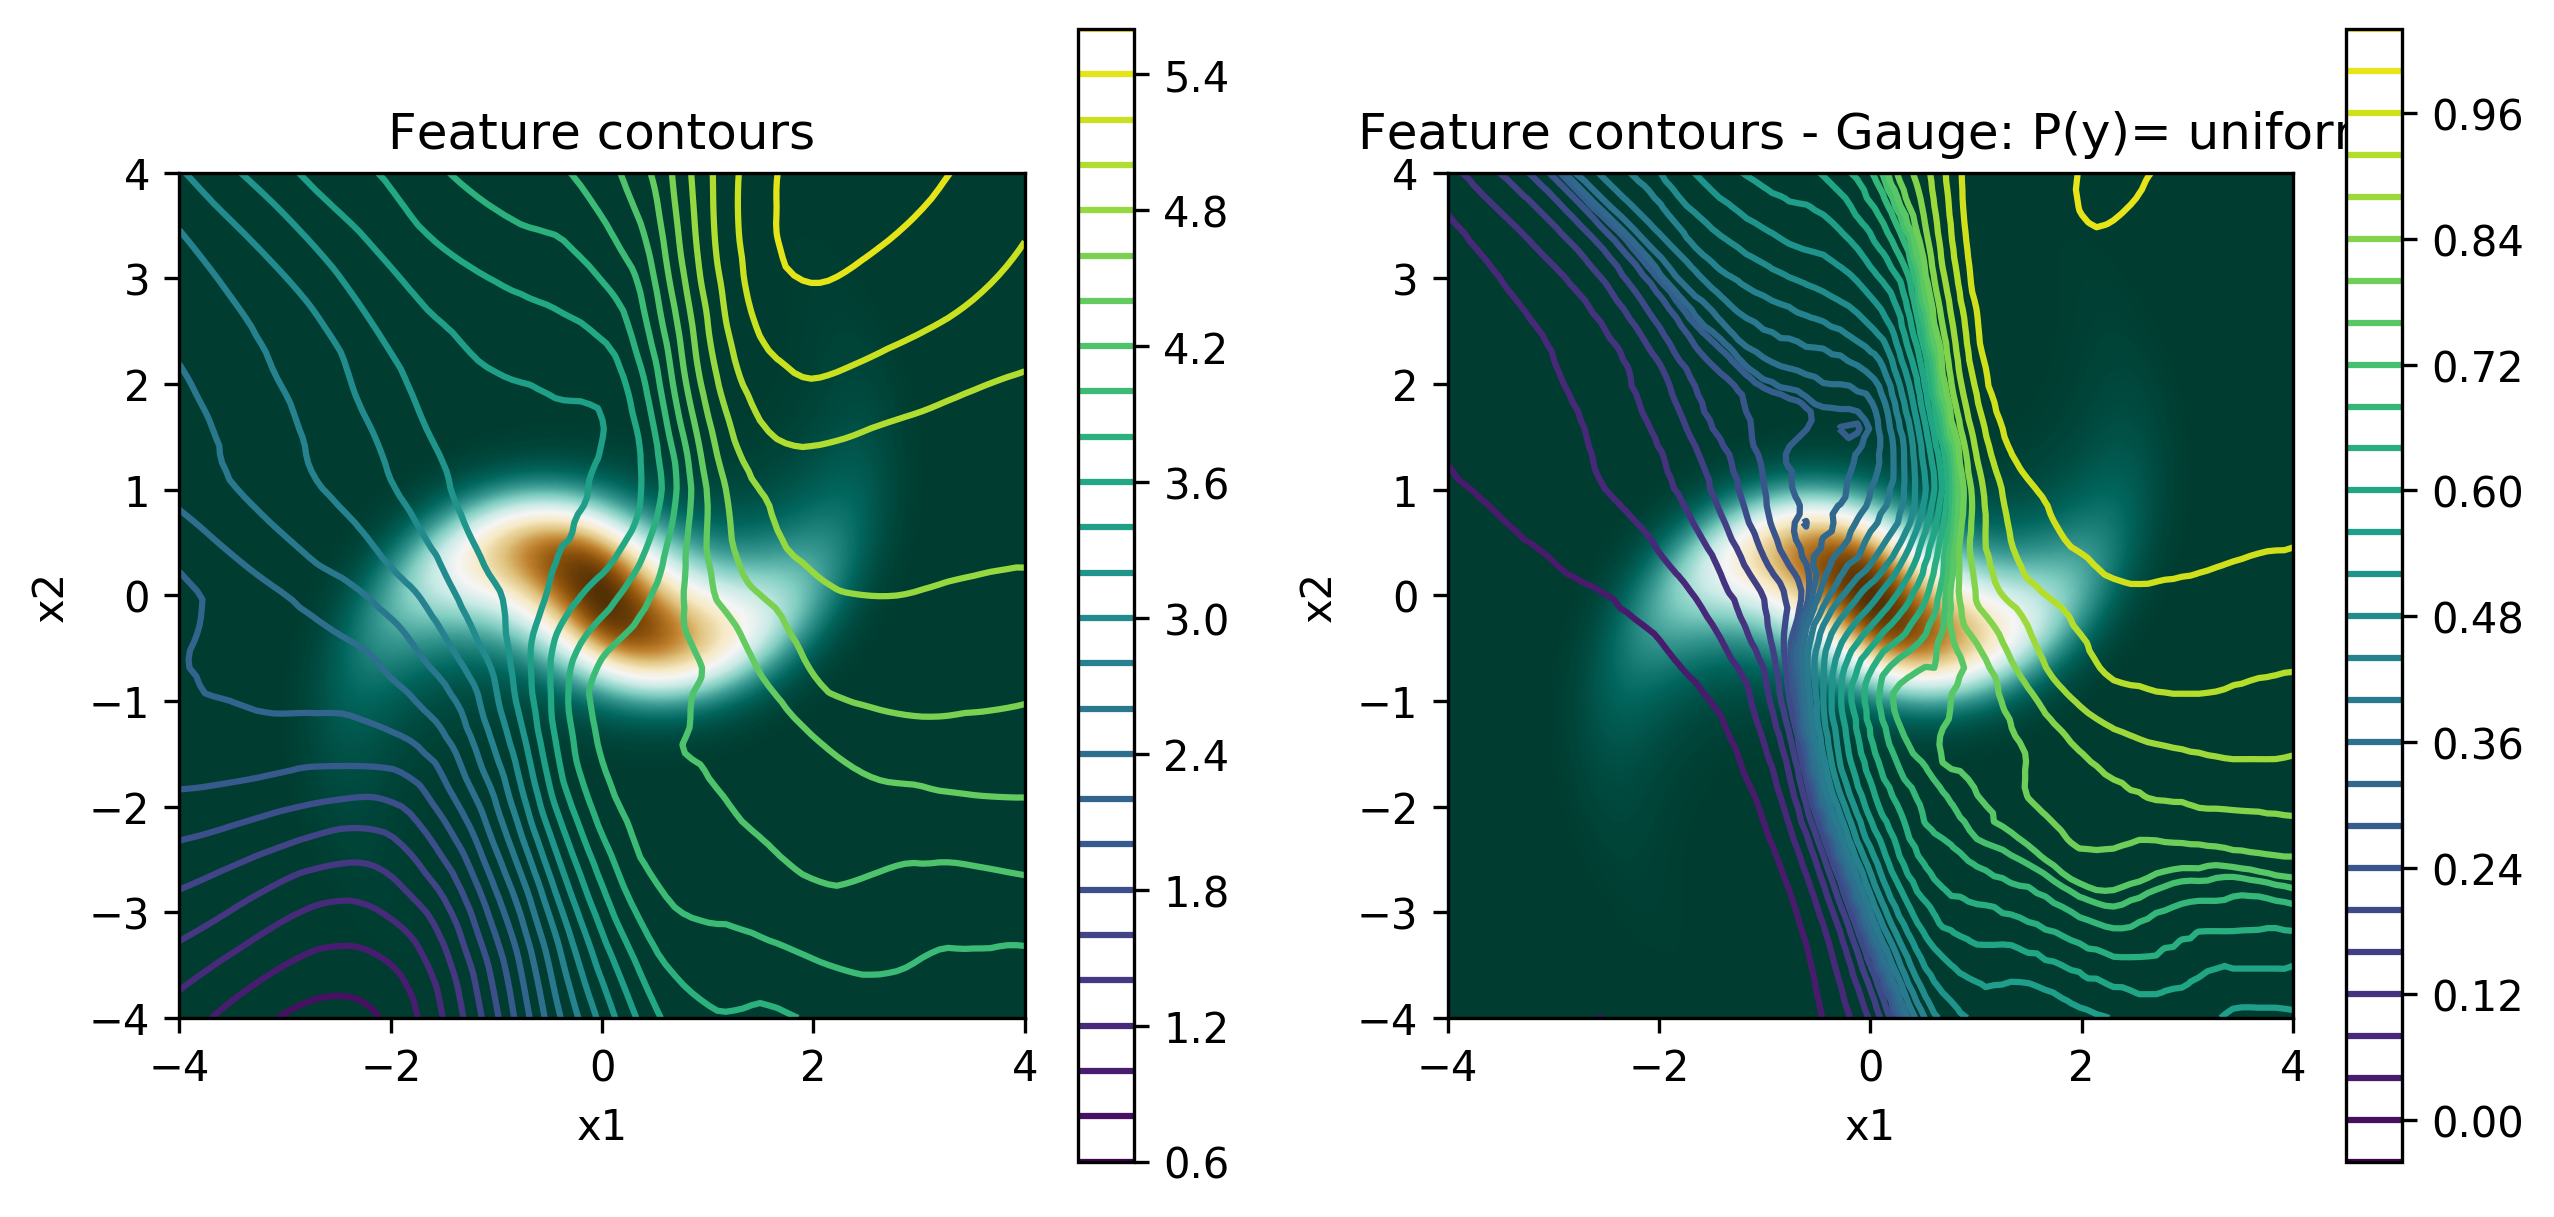

In [7]:
plt.figure(figsize=[10,5],dpi=300)
plt.subplot(1,2,1)
plt.title("Feature contours")
plt.xlabel(r"x1")
plt.ylabel("x2")
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.gca().set_aspect('equal')
plt.contourf(x1_grid,x2_grid, P_x, 1000, cmap=plt.cm.BrBG_r)
plt.contour(x1_grid,x2_grid, f,25)
plt.colorbar()

plt.subplot(1,2,2)
plt.title("Feature contours - Gauge: P(y)= uniform")
plt.xlabel(r"x1")
plt.ylabel("x2")
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.gca().set_aspect('equal')
plt.contourf(x1_grid,x2_grid, P_x, 1000, cmap=plt.cm.BrBG_r)
plt.contour(x1_grid,x2_grid, fnorm,25)
plt.colorbar()
plt.show()


The details of the features will change for each particular neural network, according to its convergence. (In the Figure in the paper, we averaged over some runs)
Trying different layouts of the neural network can produce even better results.